# Data: House Prices - Advanced Regression Techniques

### Link data: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

# Code

## 1. Import thư viện

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load dữ liệu

In [2]:
# dữ liệu Training
df_train = pd.read_csv("./house_prices_train.csv")
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# dữ liệu Test (chưa gán nhãn)
df_test = pd.read_csv("./house_prices_test.csv")
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [4]:
# nhãn của bộ Test
df_sample_submission = pd.read_csv("./house_prices_sample_submission.csv") 
df_sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [5]:
# gộp hoàn chỉnh bộ test
df_test = df_test.merge(df_sample_submission, how="left",on="Id")
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


## 3. Tiền xử lý dữ liệu

### 3.1 Tổng hợp và loại bỏ những đặc trưng không sử dụng

In [6]:
# Để tiện cho việc xử lí dữ liệu, em sẽ gộp bộ train và bộ test lại làm một và xử lí trên đó. 
# Sau đó, tách ra làm bộ train, test sau
df_data = pd.concat([df_train,df_test])
df_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000000
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000000
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000000
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,167081.220949
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,164788.778231
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,219222.423400
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,184924.279659


In [7]:
# Xóa những đặc trưng không cần thiết
df_data = df_data.drop(['Id'], axis=1)
df_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [8]:
# Hiển thị thông tin về bộ dữ liệu
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [9]:
# Hiển thị các mô tả dữ liệu trong DataFrame
df_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180052.854647
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,57381.565721
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,154795.084126
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,176734.841494
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,191895.744157
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### 3.2 Xử lí dữ liệu Nan

In [10]:
total = df_data.isnull().sum().sort_values(ascending=False)
percent = (df_data.isnull().sum()/df_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


In [11]:
# Ta có thể nhìn thấy các đặc trưng 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'
# có tỉ lệ Nan rất nhiều điều này sẽ ảnh hưởng đến kết quả dự đoán nên em sẽ xóa nó khỏi bộ dữ liệu
df_data = df_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1)
df_data.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [12]:
# Những đặc trưng còn lại có tỉ lệ Nan khá thấp nên em sẽ bỏ những dòng có giá trị Nan
df_data = df_data.dropna()
df_data

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500.000000
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500.000000
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500.000000
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.000000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,20,RL,13384,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,...,0,0,0,0,0,5,2006,WD,Normal,188506.431412
1452,160,RM,1533,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,0,12,2006,WD,Abnorml,172917.456816
1455,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,0,4,2006,WD,Abnorml,164788.778231
1456,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,0,0,0,0,0,9,2006,WD,Abnorml,219222.423400


In [13]:
# kiểm tra lại lần nữa
total = df_data.isnull().sum().sort_values(ascending=False)
percent = (df_data.isnull().sum()/df_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
MSSubClass,0,0.0
GarageYrBlt,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0


# 4. Mã hóa dữ liệu từ chữ sang số

In [14]:
col_object = df_data.select_dtypes(include=['object']).columns
col_object

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in col_object:
    df_data[col] = encoder.fit_transform(df_data[col])
df_data.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,208500.0
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,181500.0
2,60,3,11250,1,0,3,0,4,0,5,...,0,0,0,0,0,9,2008,8,4,223500.0
3,70,3,9550,1,0,3,0,0,0,6,...,272,0,0,0,0,2,2006,8,0,140000.0
4,60,3,14260,1,0,3,0,2,0,15,...,0,0,0,0,0,12,2008,8,4,250000.0


# 5. Chia dữ liệu train, test theo tỉ lệ 8:2

In [16]:
y = df_data['SalePrice']
X = df_data.drop(['SalePrice'], axis=1)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train.shape = ', X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape  = ', X_test.shape)
print('y_test.shape  = ', y_test.shape)

X_train.shape =  (2125, 73)
y_train.shape =  (2125,)
X_test.shape  =  (532, 73)
y_test.shape  =  (532,)


# 6. Lựa chọn đặc trưng(Feature selection) dựa trên phương pháp Correlation

In [18]:
corrmat = df_data.corr()
corrmat.style.background_gradient(cmap="inferno")

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.013462,-0.196728,0.001083,0.072416,-0.000268,-0.016982,0.068101,-0.015302,-0.002547,-0.026575,-0.035907,0.750977,0.389963,0.059416,-0.096630,0.070422,0.057164,-0.140262,-0.031690,-0.100367,-0.138199,-0.013139,0.014807,-0.023840,0.029463,0.079698,-0.058111,0.005661,-0.059551,-0.003531,-0.066538,0.051878,-0.076392,-0.132852,-0.248925,0.049780,0.000273,-0.054692,0.052078,-0.252731,0.305821,0.011428,0.067000,0.002994,0.001313,0.128033,0.200789,-0.055932,0.210308,0.015021,0.009130,-0.017717,-0.029345,0.111848,0.088313,-0.015405,0.012294,-0.062331,0.016303,-0.003971,0.013656,-0.012207,-0.010440,-0.033580,-0.036165,-0.042527,0.003064,-0.036371,0.002734,-0.019958,0.025836,-0.004248,-0.089107
MSZoning,0.013462,1.000000,-0.030890,0.105417,0.098034,-0.041030,-0.000869,0.008365,0.018370,-0.290002,-0.037786,0.002071,-0.043484,-0.104128,-0.203412,0.185654,-0.356336,-0.219167,-0.004128,0.001663,-0.036144,-0.025900,-0.006379,-0.060159,0.208394,-0.106396,-0.293145,0.145088,-0.048857,0.049970,0.051826,-0.063306,0.000673,0.008724,-0.052241,-0.122883,0.037202,0.185386,-0.078531,-0.108394,-0.087004,-0.017230,0.042393,-0.078889,-0.055723,0.034395,-0.214726,-0.127554,0.025025,0.059283,0.155348,-0.009390,-0.062821,-0.040915,0.179960,-0.301951,0.176222,-0.163820,-0.192900,-0.162593,-0.095230,-0.126308,-0.024342,-0.190576,0.135186,-0.004176,0.010354,-0.002835,0.004129,-0.022310,-0.032708,0.047909,-0.040959,-0.112695
LotArea,-0.196728,-0.030890,1.000000,-0.149297,-0.178321,-0.129973,0.010001,-0.124074,0.355442,0.046395,0.032396,0.020380,-0.255842,-0.025485,0.102034,-0.021168,0.019484,0.016952,0.090614,0.148540,0.008366,0.018262,-0.020530,0.125872,-0.065240,-0.008200,0.012425,-0.075947,0.005023,-0.136761,-0.050009,0.201201,-0.047435,0.085118,0.019780,0.282849,0.089593,-0.009375,0.037258,0.041487,0.315209,0.034064,0.002849,0.274649,0.134223,0.029971,0.119935,0.033739,0.134639,-0.011590,-0.078777,0.211085,-0.044477,0.257700,-0.153439,0.004470,-0.100981,0.171910,0.209751,0.032021,0.035150,-0.004594,0.156091,0.099163,0.021322,0.017121,0.053354,0.075778,0.072272,0.008278,-0.021772,0.007850,0.016724,0.287415
Street,0.001083,0.105417,-0.149297,1.000000,-0.008626,0.093753,0.001131,0.013758,-0.114902,0.004729,-0.077515,0.000918,0.007587,0.029075,0.061936,0.008138,0.059335,0.081812,-0.018144,0.006589,-0.004466,-0.007401,0.008301,0.021785,0.042432,0.022418,0.022813,-0.028698,0.013515,0.036492,-0.031132,0.015998,0.025261,-0.014133,0.004998,0.017196,0.005589,-0.028692,0.051266,0.010391,0.021796,0.037465,0.005143,0.049556,-0.011906,0.015006,0.049524,0.020005,0.030517,0.009674,-0.015786,0.047356,0.008445,0.006869,-0.027401,0.066637,-0.019061,-0.011546,-0.025605,0.015950,0.027985,0.115540,0.005921,0.001476,-0.056424,0.006124,-0.012272,0.003689,-0.009438,0.004655,-0.029002,0.001732,0.027517,0.032170
LotShape,0.072416,0.098034,-0.178321,-0.008626,1.000000,0.093636,-0.025928,0.192981,-0.085819,-0.059041,-0.110510,-0.027189,0.066279,-0.135123,-0.249558,0.073655,-0.279776,-0.192445,-0.009572,-0.061627,-0.012454,-0.029869,0.027362,-0.116360,0.175204,-0.049992,-0.203557,0.198434,-0.035744,0.173178,0.076591,-0.142832,0.012301,-0.035603,-0.006638,-0.182271,0.047547,0.123917,

<AxesSubplot:>

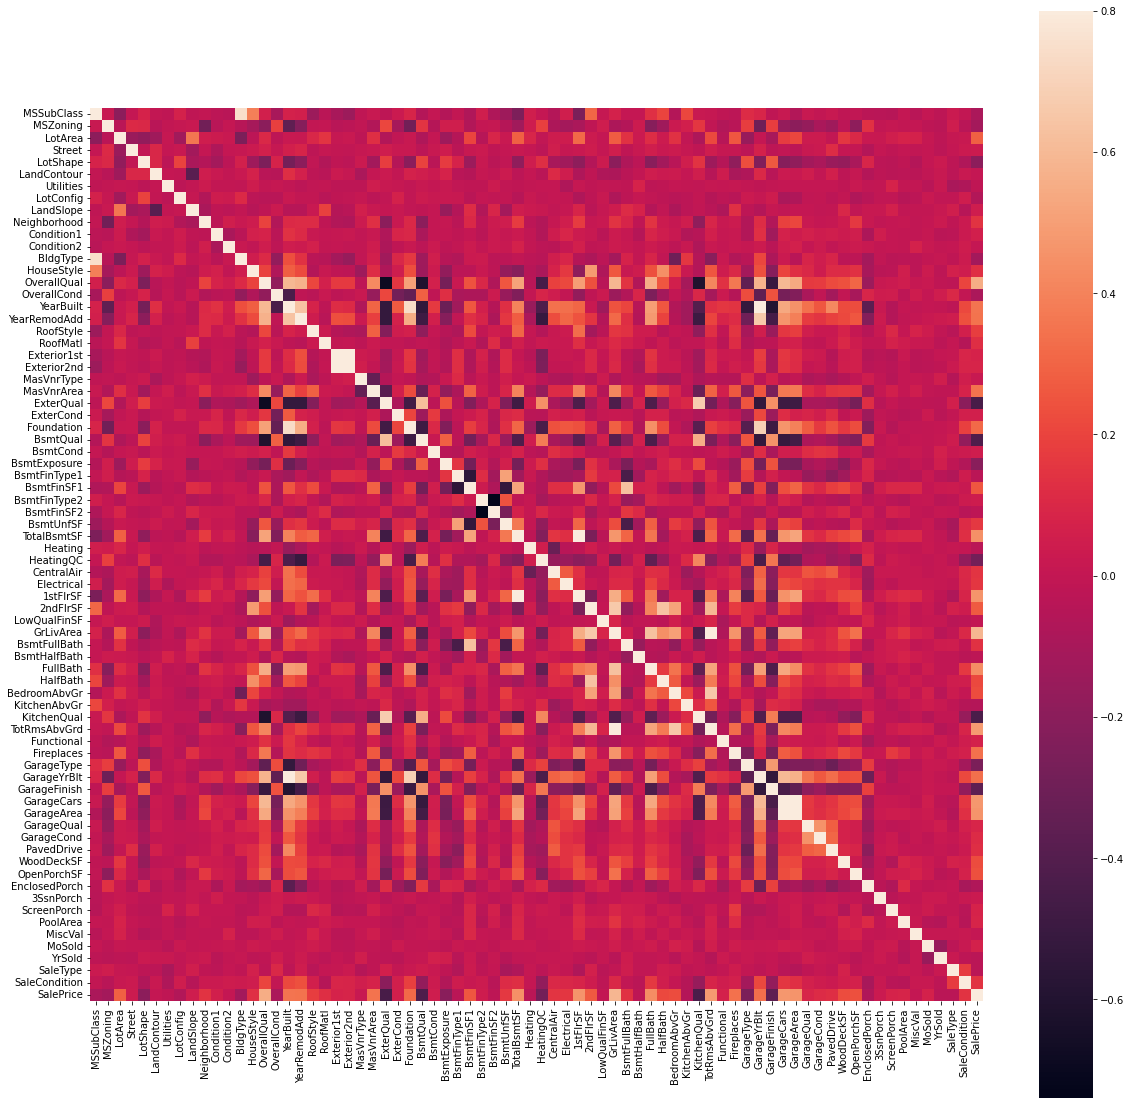

In [19]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8, square=True)

In [20]:
# trả về các feature có corr
def correlation(dataset, threshold):
    col_corr = set()
    corr_metric = dataset.corr()
    for i in range(len(corr_metric.columns)):
        for j in range(i):
            if abs(corr_metric.iloc[i,j]) > threshold:
                colname = corr_metric.columns[i]
                col_corr.add(colname)
    return col_corr
a = correlation(X_train, 0)
print(len(a))
print(a)

71
{'ExterQual', 'OpenPorchSF', 'GarageType', 'GarageQual', 'ScreenPorch', 'GarageCond', 'RoofStyle', 'ExterCond', 'Heating', 'OverallQual', 'KitchenAbvGr', 'Condition2', 'WoodDeckSF', 'MiscVal', 'FullBath', 'GarageFinish', 'MSZoning', 'MasVnrType', 'BsmtFinType2', 'BldgType', 'MoSold', 'GarageCars', 'TotalBsmtSF', 'BsmtExposure', 'LandSlope', 'BsmtFinSF1', 'TotRmsAbvGrd', 'Neighborhood', 'LotArea', 'KitchenQual', 'Condition1', 'Street', 'LotConfig', 'OverallCond', 'YearBuilt', 'LotShape', 'Exterior2nd', 'Functional', 'GarageArea', 'BsmtQual', 'PavedDrive', 'BsmtCond', 'GarageYrBlt', 'BsmtFinSF2', 'BsmtFinType1', '2ndFlrSF', 'BedroomAbvGr', '1stFlrSF', '3SsnPorch', 'LowQualFinSF', 'LandContour', 'PoolArea', 'RoofMatl', 'YearRemodAdd', 'SaleCondition', 'Exterior1st', 'HeatingQC', 'EnclosedPorch', 'HouseStyle', 'SaleType', 'BsmtHalfBath', 'Fireplaces', 'MasVnrArea', 'Foundation', 'Electrical', 'GrLivArea', 'BsmtFullBath', 'CentralAir', 'HalfBath', 'BsmtUnfSF', 'YrSold'}


# 7. Xây dựng, huấn luyện model và đánh giá model

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

models = {}
data = {}
data_scale = {}
data_test = {}
data_test_scale = {}
scaler = {}

for i in range(10):
    features = correlation(X_train, i/10)           # lựa chọn features
    name = f'Threshold {i/10} ({len(X_train.columns) - len(features)})'    # tên model tương ứng để traing cho nhiều loại feature
    
    models[name] = LinearRegression()   # xây dựng model
    
    data[name] = X_train.drop(features, axis=1)     # trích xuất features
    data_test[name] = X_test.drop(features, axis=1)     # trích xuất features

    scaler[name] = MinMaxScaler()                             # khởi tạo bộ chuẩn hóa
    data_scale[name] = scaler[name].fit_transform(data[name])   # chuẩn hóa dữ liệu
    data_test_scale[name] = scaler[name].fit_transform(data_test[name])
models

{'Threshold 0.0 (2)': LinearRegression(),
 'Threshold 0.1 (6)': LinearRegression(),
 'Threshold 0.2 (25)': LinearRegression(),
 'Threshold 0.3 (35)': LinearRegression(),
 'Threshold 0.4 (43)': LinearRegression(),
 'Threshold 0.5 (48)': LinearRegression(),
 'Threshold 0.6 (56)': LinearRegression(),
 'Threshold 0.7 (65)': LinearRegression(),
 'Threshold 0.8 (68)': LinearRegression(),
 'Threshold 0.9 (73)': LinearRegression()}

In [22]:
data['Threshold 0.0 (2)']

,MSSubClass,Utilities
971,160,0
487,20,0
1240,60,0
511,60,0
293,60,0
...,...,...
321,20,0
1196,60,0
1236,160,0
1413,20,0


In [23]:
from sklearn.metrics import mean_absolute_error

def evaluate_model(name):
    start = time.time()                 # thời gian bắt đầu
    y_pred = models[name].predict(data_test_scale[name])      # dự đoán
    time_test = time.time() - start     # tính thời gian quá trình dự đoán

    MAE = mean_absolute_error(y_test, y_pred)
    
    return (time_test, MAE)

In [24]:
import time
compare = {}
for name, model in models.items():
    print(f'Model {name}')
    # training
    start = time.time()
    model.fit(data_scale[name], y_train)
    time_train = time.time() - start

    # testing
    time_test, MAE = evaluate_model(name)

    # save compare
    compare[name] = {
        'time_train': time_train,
        'time_test': time_test,
        'MAE': MAE,
        }
    print('-'*75)

Model Threshold 0.0 (2)
---------------------------------------------------------------------------
Model Threshold 0.1 (6)
---------------------------------------------------------------------------
Model Threshold 0.2 (25)
---------------------------------------------------------------------------
Model Threshold 0.3 (35)
---------------------------------------------------------------------------
Model Threshold 0.4 (43)
---------------------------------------------------------------------------
Model Threshold 0.5 (48)
---------------------------------------------------------------------------
Model Threshold 0.6 (56)
---------------------------------------------------------------------------
Model Threshold 0.7 (65)
---------------------------------------------------------------------------
Model Threshold 0.8 (68)
---------------------------------------------------------------------------
Model Threshold 0.9 (73)
--------------------------------------------------------------------

# 8. So sánh các model

In [25]:
# chuyển dict ở trên thành DataFrame để tiện xử lí
df_compare = pd.DataFrame(compare).T
df_compare

,time_train,time_test,MAE
Threshold 0.0 (2),0.024993,0.000000,3.499396e+04
Threshold 0.1 (6),0.002999,0.000998,3.466850e+04
Threshold 0.2 (25),0.016996,0.001001,3.405849e+04
Threshold 0.3 (35),0.011999,0.000000,4.687250e+04
Threshold 0.4 (43),0.011007,0.000000,4.964559e+04
Threshold 0.5 (48),0.021002,0.001008,4.900758e+04
Threshold 0.6 (56),0.029999,0.001001,2.426673e+15
Threshold 0.7 (65),0.028002,0.001001,2.589768e+15
Threshold 0.8 (68),0.031996,0.001007,1.273811e+16
Threshold 0.9 (73),0.031986,0.006087,2.890336e+15


In [26]:
# hightight những kết quả nổi bật
df_compare.style.highlight_min(color = 'red', axis = 0)

,time_train,time_test,MAE
Threshold 0.0 (2),0.024993,0.000000,34993.956444
Threshold 0.1 (6),0.002999,0.000998,34668.499440
Threshold 0.2 (25),0.016996,0.001001,34058.493109
Threshold 0.3 (35),0.011999,0.000000,46872.500488
Threshold 0.4 (43),0.011007,0.000000,49645.594848
Threshold 0.5 (48),0.021002,0.001008,49007.582030
Threshold 0.6 (56),0.029999,0.001001,2426672835907822.500000
Threshold 0.7 (65),0.028002,0.001001,2589767526943723.500000
Threshold 0.8 (68),0.031996,0.001007,12738106487371796.000000
Threshold 0.9 (73),0.031986,0.006087,2890336252020409.500000


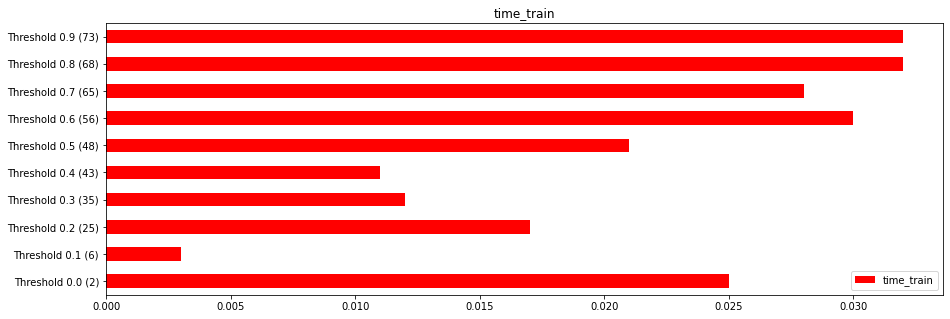

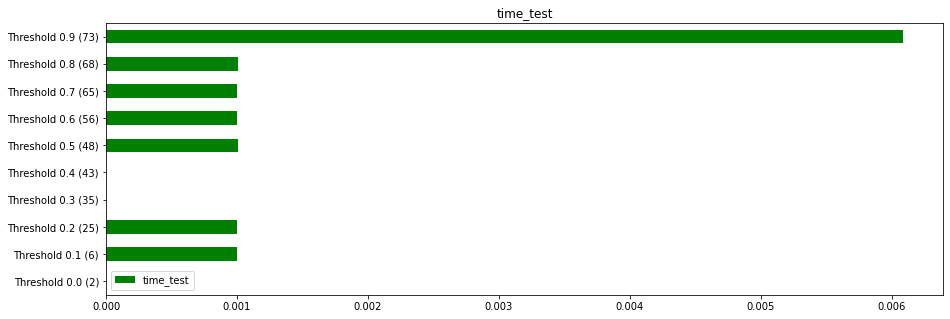

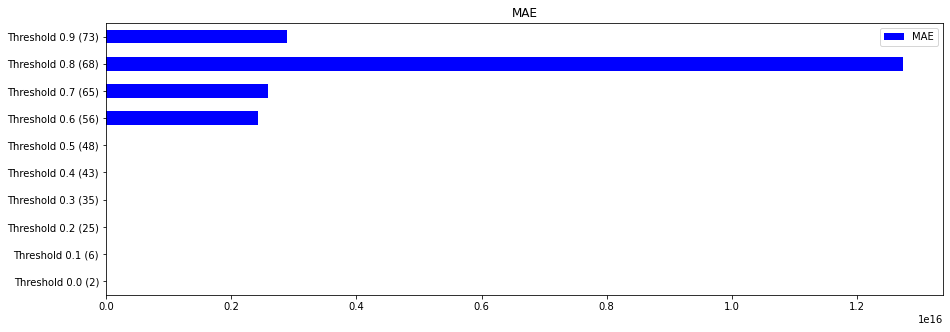

In [27]:
# vẽ biểu đồ so sánh các độ đo giữa các model với nhau
colors = ['red', 'green', 'blue', 'orange', 'purple', 'violet', 'greenyellow', 'coral', 'darkgreen', 'darkorange', 'red', 'green', 'blue']
for i, col in enumerate(df_compare.columns):
    df_compare.plot(kind= 'barh', y=col, figsize=(15,5), color=colors[i], title=col)